In [1]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

# Memuat dataset
data = pd.read_csv('HeartDiseaseTrain-Test.csv')

# Memisahkan kolom numerik dan kategorikal
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Menangani nilai hilang untuk kolom numerik (imputasi dengan mean)
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Menangani nilai hilang untuk kolom kategorikal (imputasi dengan mode)
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Melakukan One-Hot Encoding untuk kolom kategorikal
data = pd.get_dummies(data, drop_first=True)

# Menampilkan 5 baris pertama untuk melihat hasil preprocessing
print(data.head())


   age  resting_blood_pressure  cholestoral  Max_heart_rate  oldpeak  target  \
0   52                     125          212             168      1.0       0   
1   53                     140          203             155      3.1       0   
2   70                     145          174             125      2.6       0   
3   61                     148          203             161      0.0       0   
4   62                     138          294             106      1.9       0   

   sex_Male  chest_pain_type_Atypical angina  \
0      True                            False   
1      True                            False   
2      True                            False   
3      True                            False   
4     False                            False   

   chest_pain_type_Non-anginal pain  chest_pain_type_Typical angina  ...  \
0                             False                            True  ...   
1                             False                            True  ...   
2 

In [15]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['target'])  # ganti 'target' dengan nama kolom target yang sesuai
y = data['target']  # ganti 'target' dengan nama kolom target yang sesuai

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran data setelah pemisahan
print(f'Ukuran training data: {X_train.shape}')
print(f'Ukuran testing data: {X_test.shape}')

Ukuran training data: (717, 22)
Ukuran testing data: (308, 22)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Melatih model Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Membuat prediksi
y_pred = clf.predict(X_test)

# Menghitung akurasi dan menampilkan laporan klasifikasi
print("Akurasi: ", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi:  0.9707792207792207
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



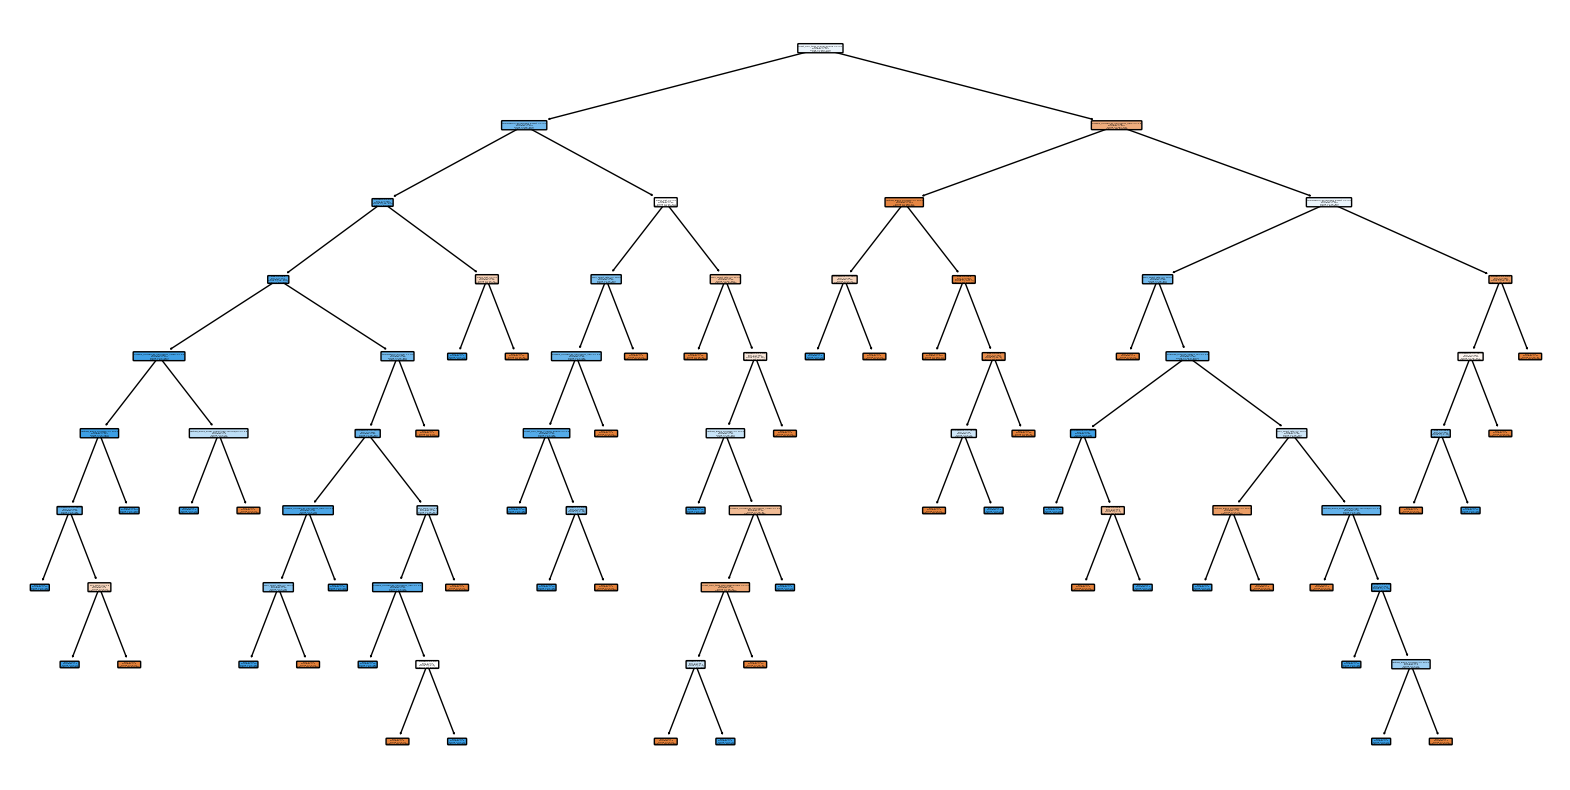

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualisasi pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
plt.show()